In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
############################## Data Connection ##############################
folder_path = '/content/drive/MyDrive/Data/Cleaning Data - Practice'

filenames = os.listdir(folder_path)
dfs = []

for file_name in filenames:
  file_path = folder_path + '/' + file_name
  df = pd.read_excel(file_path)
  # Data Cleaning & Transf.
  df = df.dropna(how = 'all')
  dfs.append(df)

df = pd.concat(dfs, ignore_index=True)


In [ ]:
############################## Data Cleaning and Transformation ##############################
#Put headers in the cols names
df.columns = df.loc[1]
#remove repeated headers
df = df[df.iloc[:, 1] != "Limestone"]

#collect dates into one df
date = df[df.iloc[:, 0] == "Date"]
date = date.drop(["Shale",	"Sand",	"Iron Ore",	"Total Production"], axis=1)
date = date.rename(columns={"Limestone": "Date"})
#drop to the first unused col
date = date.iloc[:, 1:]
#reformat the date col
date['Date'] = pd.to_datetime(date['Date'],format = '%Y-%m-%d')

#insert date col in df
df['Date'] = date['Date']
# tells Pandas to fill the null values with the last non-null value seen
df['Date'] = df['Date'].ffill()
#remove row contains date
df = df[df.iloc[:, 0] != "Date"]

df['Limestone'] = df['Limestone'].astype(int)
df['Shale'] = df['Shale'].astype(int)
df['Sand'] = df['Sand'].astype(int)
df['Iron Ore'] = df['Iron Ore'].astype(int)
df['Total Production'] = df['Total Production'].astype(int)
df = df.rename(columns={df.columns[0]: 'Mill'})

df.head(50)

<ipython-input-8-7375928c5321>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = date['Date']
<ipython-input-8-7375928c5321>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].ffill()


1,Mill,Limestone,Shale,Sand,Iron Ore,Total Production,Date
2,Ball Mill 01,4296,726,130,127,5279,2023-01-01
3,Ball Mill 02,4277,749,128,126,5280,2023-01-01
4,Ball Mill 03,4296,726,133,132,5287,2023-01-01
5,Ball Mill 04,4082,726,126,130,5064,2023-01-01
8,Ball Mill 01,4296,726,130,127,5279,2023-01-03
9,Ball Mill 02,4277,749,128,126,5280,2023-01-03
10,Ball Mill 03,4296,726,133,132,5287,2023-01-03
11,Ball Mill 04,4082,726,126,130,5064,2023-01-03
14,Ball Mill 01,4296,726,130,127,5279,2023-01-04
15,Ball Mill 02,4277,749,128,126,5280,2023-01-04


In [ ]:
############################### data analysis ###############################
# Summary Statistics
summary = df.describe()
print("\nSummary Statistics:")
print(summary)


Summary Statistics:
1        Limestone       Shale        Sand   Iron Ore  Total Production  \
count    28.000000   28.000000   28.000000   28.00000         28.000000   
mean   4267.678571  731.750000  129.250000  128.75000       5257.428571   
min     435.000000  726.000000  126.000000  126.00000       1438.000000   
25%    4082.000000  726.000000  127.500000  126.75000       5064.000000   
50%    4286.500000  726.000000  129.000000  128.50000       5279.500000   
75%    4296.000000  731.750000  130.750000  130.50000       5287.000000   
max    8976.000000  749.000000  133.000000  132.00000       9959.000000   
std    1172.367028   10.142047    2.633474    2.42861       1170.100991   

1                               Date  
count                             28  
mean   2023-01-15 06:51:25.714285824  
min              2023-01-01 00:00:00  
25%              2023-01-02 00:00:00  
50%              2023-01-04 00:00:00  
75%              2023-02-01 00:00:00  
max              2023-03-01 00

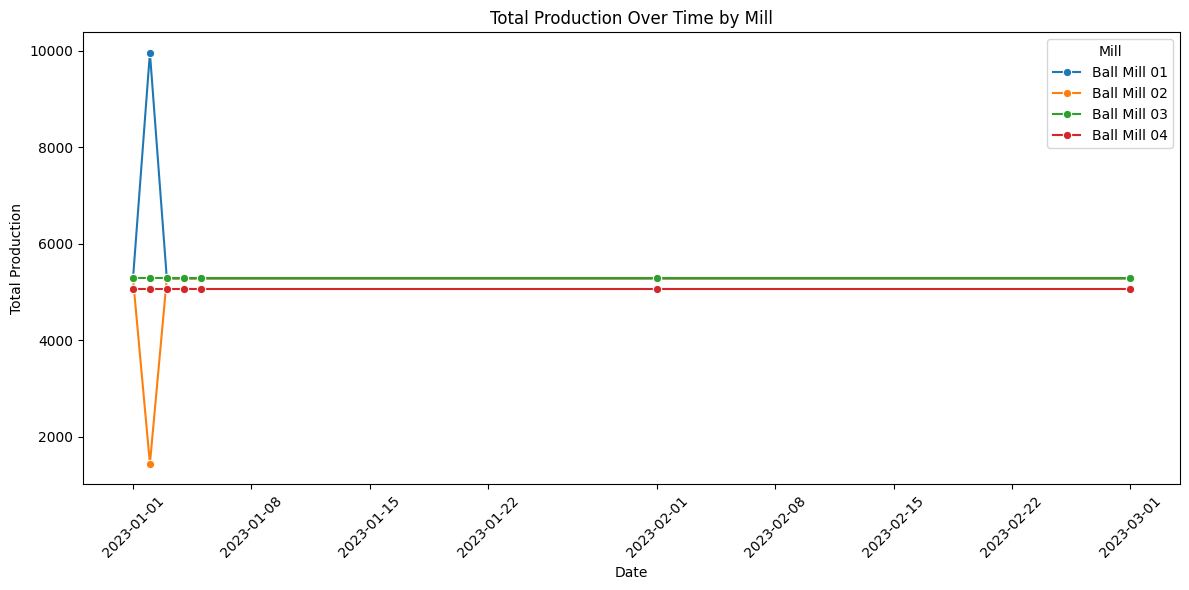

In [ ]:
############################### data Visualization ###############################
# Trend Analysis: Line Plot for Total Production Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Total Production', hue='Mill', marker='o')
plt.title('Total Production Over Time by Mill')
plt.xlabel('Date')
plt.ylabel('Total Production')
plt.legend(title='Mill')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

39	Ball Mill 02	**435**	749	128	126	1438	**2023-01-02**
Unresonable decrement in Limstone production  

38	Ball Mill 01	**8976**	726	130	127	9959	**2023-01-02**
Unresonable increament in Limstone production  


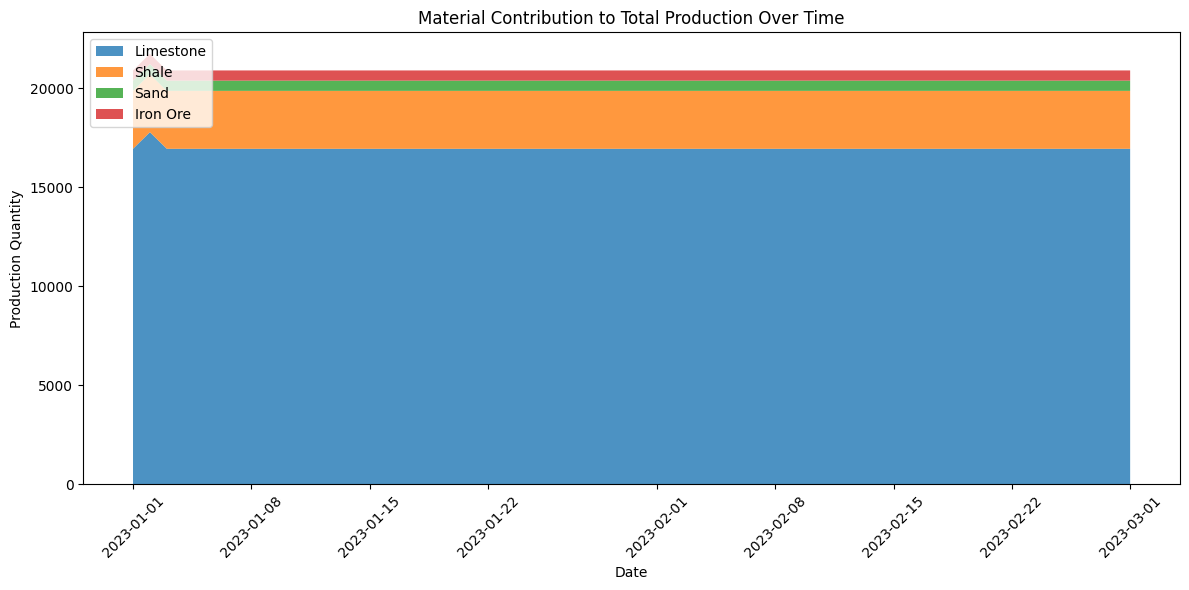

In [ ]:
# Stacked Area Plot to Show Contribution to Total Production
df_grouped = df.groupby('Date').sum()

plt.figure(figsize=(12, 6))
plt.stackplot(
    df_grouped.index,
    df_grouped['Limestone'],
    df_grouped['Shale'],
    df_grouped['Sand'],
    df_grouped['Iron Ore'],
    labels=['Limestone', 'Shale', 'Sand', 'Iron Ore'],
    alpha=0.8
)
plt.title('Material Contribution to Total Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production Quantity')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()